In [10]:
import sys
sys.path.append("..")
from generative_models import utils

from matplotlib import pyplot as plt
import numpy as np

from keras.datasets import mnist

In [20]:
def timeserie_to_bitmap(timeserie, window_size):
    def discretize_timeserie(timeserie, sections_n):
        processed_timeserie = np.array(timeserie)
        split = 2 / sections_n
        for i in range(sections_n):
            processed_timeserie[np.logical_and(processed_timeserie > (-1 + split * i), processed_timeserie < (-1 + split * (i + 1)))] = -1 + split * i
        return processed_timeserie
    
    sections_n = 4
    split = 2 / sections_n
    side = int(np.sqrt(sections_n))
    bitmap_side = side * window_size

    bitmap = np.zeros((bitmap_side, bitmap_side))
    
    processed_timeserie = discretize_timeserie(timeserie, sections_n)
    
    i = 0
    while i * window_size  <= len(processed_timeserie)-window_size:
        index_i = bitmap_side
        index_j = bitmap_side
        for j in range(window_size):
            element = processed_timeserie[i*window_size + j]
            if element == -1:
                index_i /= 2
                index_j /= 2
            elif element == -1 + split:
                index_i /= 2
            elif element == -1 + 2 * split:
                index_j /= 2
            else:
                pass
            
            index_i = int(index_i)
            index_j = int(index_j)
        bitmap[index_i-1, index_j-1] += 1
        i += 1
    bitmap /= np.max(bitmap)
    return bitmap

def generate_bitmaps(dataset, window_size):
    bitmaps = []
    for i in range(dataset.shape[0]):
        if i % 10000 == 0:
            print(i, '/', dataset.shape[0])
        bitmaps.append(timeserie_to_bitmap(dataset[i], window_size))
    return np.array(bitmaps)

In [21]:
timesteps = 90
elements = 50000

transactions_filepath = '../../datasets/berka_dataset/usable/normalized_transactions_months.npy'
real_data = utils.load_splitted_dataset(transactions_filepath, timesteps)[:elements]

vanilla_generated_data_filepath = '../generative_models/wgan_gp/outputs/final/vanilla/generated_datasets/1000000_generated_data.npy'    
generated_vanilla = np.load(vanilla_generated_data_filepath)

mbd_generated_data_filepath = '../generative_models/wgan_gp/outputs/final/mbd/generated_datasets/1000000_generated_data.npy'    
generated_mbd = np.load(mbd_generated_data_filepath)

packing_generated_data_filepath = '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/1000000_generated_data.npy'    
generated_packing = np.load(packing_generated_data_filepath)

0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000


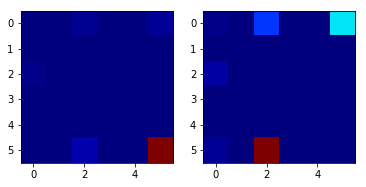

0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000


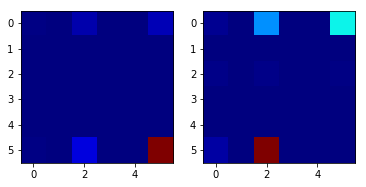

0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000


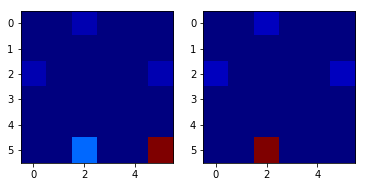

0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000


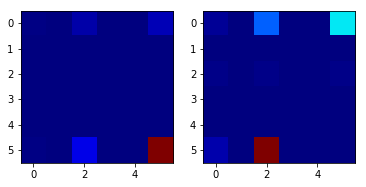

In [8]:
def plot_pair_bitmaps(bitmap_1, bitmap_2):
    plt.subplots(1, 2)
    plt.subplot(1, 2, 1)
    plt.imshow(bitmap_1, cmap='jet')
    plt.subplot(1, 2, 2)
    plt.imshow(bitmap_2, cmap='jet')
    plt.show()

window_size = 3

bitmaps_real = generate_bitmaps(real_data, window_size)
bitmaps_real_mean = np.mean(bitmaps_real, axis=0)
bitmaps_real_variance = np.var(bitmaps_real, axis=0)

plot_pair_bitmaps(bitmaps_real_mean, bitmaps_real_variance)


bitmaps_vanilla = generate_bitmaps(generated_vanilla, window_size)
bitmaps_vanilla_mean = np.mean(bitmaps_vanilla, axis=0)
bitmaps_vanilla_variance = np.var(bitmaps_vanilla, axis=0)

plot_pair_bitmaps(bitmaps_vanilla_mean, bitmaps_vanilla_variance)


bitmaps_mbd = generate_bitmaps(generated_mbd, window_size)
bitmaps_mbd_mean = np.mean(bitmaps_mbd, axis=0)
bitmaps_mbd_variance = np.var(bitmaps_mbd, axis=0)

plot_pair_bitmaps(bitmaps_mbd_mean, bitmaps_mbd_variance)


bitmaps_packing = generate_bitmaps(generated_packing, window_size)
bitmaps_packing_mean = np.mean(bitmaps_packing, axis=0)
bitmaps_packing_variance = np.var(bitmaps_packing, axis=0)

plot_pair_bitmaps(bitmaps_packing_mean, bitmaps_packing_variance)

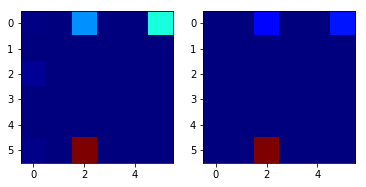

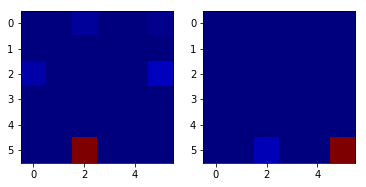

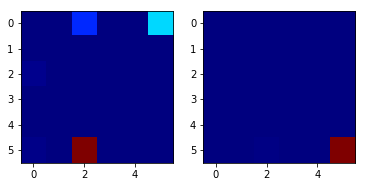

In [9]:
plot_pair_bitmaps((bitmaps_real_mean - bitmaps_vanilla_mean) ** 2, (bitmaps_real_variance - bitmaps_vanilla_variance) ** 2)
plot_pair_bitmaps((bitmaps_real_mean - bitmaps_mbd_mean) ** 2, (bitmaps_real_variance - bitmaps_mbd_mean) ** 2)
plot_pair_bitmaps((bitmaps_real_mean - bitmaps_packing_mean) ** 2, (bitmaps_real_variance - bitmaps_packing_mean) ** 2)